In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
import time

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

In [2]:
hdmi_in.configure(PIXEL_GRAY)
hdmi_out.configure(hdmi_in.mode,PIXEL_GRAY)

hdmi_in.start()
hdmi_out.start()

#hdmi_in.tie(hdmi_out)

In [15]:
hdmi_in.tie(hdmi_out)

In [22]:
import cv2
import numpy as np
import time
numframes = 10


start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    #cv2.cvtColor(inframe,cv2.COLOR_RGB2GRAY,dst=grayscale)
    #inframe.freebuffer()
    outframe = hdmi_out.newframe()
    cv2.Canny(inframe, 50, 100, edges=outframe)
    inframe.freebuffer()
    
    #outframe = hdmi_out.newframe()
    #cv2.cvtColor(result, cv2.COLOR_GRAY2RGB,dst=outframe)
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))
print("Second:  " + str(end - start))

Frames per second:  5.958828812727613
Second:  1.6781821250915527


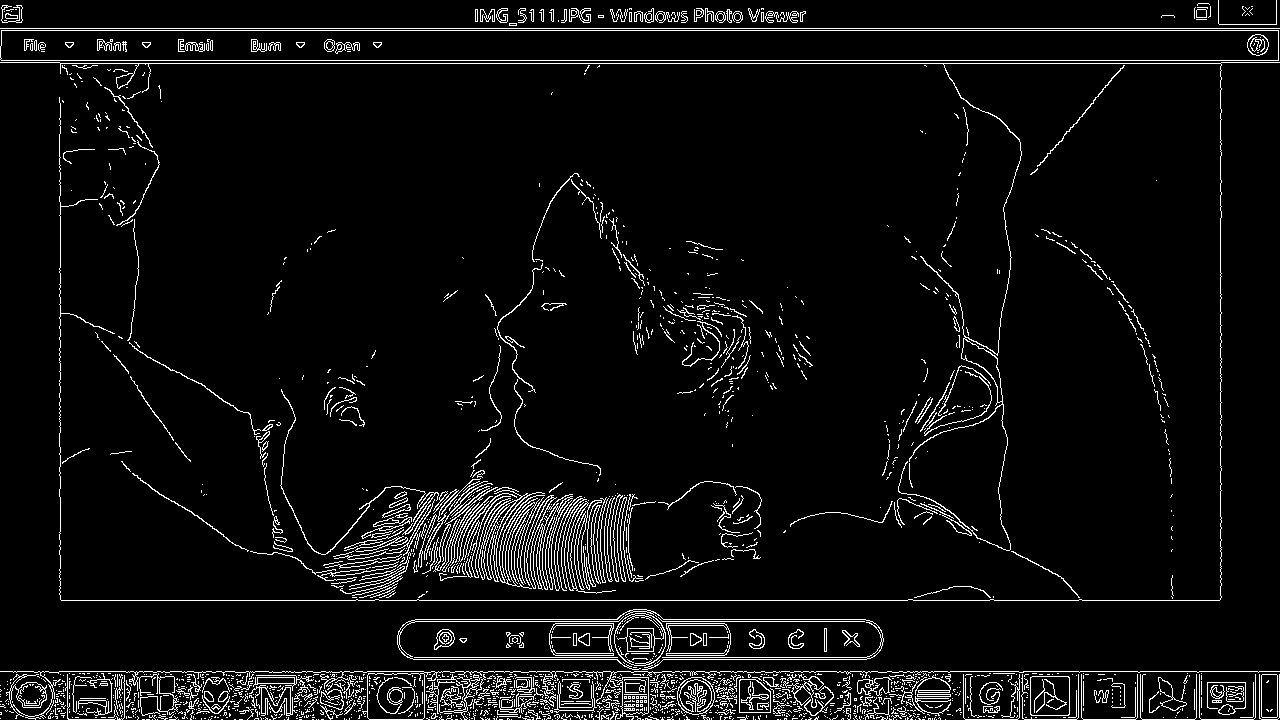

In [19]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(outframe)
#image.save(cannyDesktop)
image

In [15]:
help(hdmi_out.newframe)

Help on method newframe in module pynq.lib.video:

newframe() method of pynq.lib.video.HDMIOut instance
    Return an unintialised video frame of the correct type for the
    pipeline



In [6]:
help(image)

Help on Image in module PIL.Image object:

class Image(builtins.object)
 |  This class represents an image object.  To create
 |  :py:class:`~PIL.Image.Image` objects, use the appropriate factory
 |  functions.  There's hardly ever any reason to call the Image constructor
 |  directly.
 |  
 |  * :py:func:`~PIL.Image.open`
 |  * :py:func:`~PIL.Image.new`
 |  * :py:func:`~PIL.Image.frombytes`
 |  
 |  Methods defined here:
 |  
 |  __copy__ = copy(self)
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |      # Context Manager Support
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __exit__(self, *args)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __ne__(self, other)
 |      Return self!=value.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setstate__(self, state)
 |  
 |  alpha_composite(self, im, dest=(0, 0), source=(0, 0))
 |      'In-place' analog of Image.alpha_com

In [6]:
import time

numframes = 600
start = time.time()

for _ in range(numframes):
    f = hdmi_in.readframe()
    hdmi_out.writeframe(f)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

AttributeError: 'numpy.ndarray' object has no attribute 'freebuffer'

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

outframe = hdmi_in.readframe()

result = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                    dtype=np.uint8)

img = cv2.imread('messi5.jpg',0)
cv2.Canny(img,100,200,edges=result)

outframe = edges

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

hdmi_out.writeframe(outframe)

In [ ]:
hdmi_out.close()
hdmi_in.close()